<a href="https://colab.research.google.com/github/Alf-caput/P4_AlgoritmoGenetico/blob/dev1/P4_AlgGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICA 4: Algoritmo genético

### Ana Robledano, Miguel Egido, Alfredo Robledano.

1.- Encontrar los máximos de la función "picos"

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio $$\{x,y\} \in [-100,100]$$


In [28]:
!pip install deap


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import random
from deap import base, creator, tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

random.seed(42)

VALID_RANGE_INITIAL = (-3, 3)
INDIVIDUAL_SIZE = 2
POPULATION_SIZE = 32

toolbox = base.Toolbox()

toolbox.register("attr_uniform", random.uniform, *VALID_RANGE_INITIAL)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_uniform, INDIVIDUAL_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, POPULATION_SIZE)

c:\Users\alfre\Desktop\Utils\P4_AlgoritmoGenetico\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\alfre\Desktop\Utils\P4_AlgoritmoGenetico\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [30]:
import math
from functools import partial

F = lambda x, y: 3*(1-x)**2*math.exp(-(x**2)-(y+1)**2)-10*(x/5-x**3-y**5)*math.exp(-x**2-y**2)-1/3*math.exp(-(x+1)**2-y**2)

def evaluate_fit(individual, target_function, gene_range):
    for gene in individual:
        if not (gene_range[0] <= gene <= gene_range[1]):
            return -1,
    return target_function(*individual),

VALID_RANGE = (-100, 100)
toolbox.register("evaluate", partial(evaluate_fit, target_function=F, gene_range=VALID_RANGE))

In [31]:
MU = 0 # mean
SIGMA = 5 # standard deviation
INDPB = 0.1 # independent probability for each atribute to be mutated
TOURNAMENT_SIZE = 3

toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=MU, sigma=SIGMA, indpb=INDPB)
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)

In [32]:
from deap import algorithms
import numpy as np

CXPB = 0.5 # probability of mating 2 individuals
MUTPB = 0.2 # probabilty of mutating an individual
NGEN = 20 # number of generations

pop = toolbox.population()

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)

stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

logbook = tools.Logbook()
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

AttributeError: 'Toolbox' object has no attribute 'population_initial'

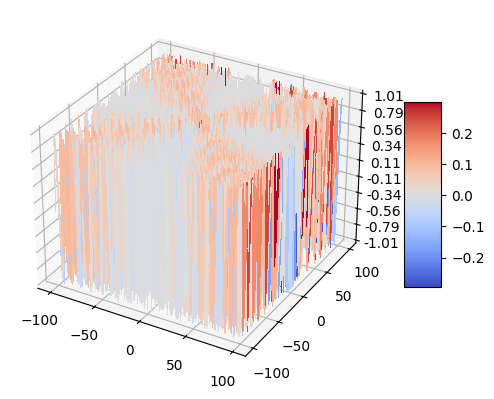

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-100, 100)
Y = np.arange(-100, 100)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



2.- Dada la [Función de Rastringin](https://en.wikipedia.org/wiki/Rastrigin_function#:~:text=In%20mathematical%20optimization%2C%20the%20Rastrigin,has%20been%20generalized%20by%20Rudolph.), con A = 10 y  $$\{xi\} \in [-5.12,5.12]$$

Implementa dicha función en Python y minimízala para n=10

Compara el funcionamiento del Algoritmo Genético para cruce con un punto con cruce con dos puntos

### Instalación de librerías para resolver Algoritmos Genéticos con Python

In [ ]:
#!pip install deap
#!pip install matplotlib
#!pip install numpy
#!pip install scipy
#!pip install scoop